In [26]:
import pandas as pd

import xgboost as xgb 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


In [40]:
# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [28]:
column_names = ["Suit of card #1", "Rank of card #1", "Suit of card #2", "Rank of card #2", "Suit of card #3", "Rank of card #3", "Suit of card #4", "Rank of card #4", "Suit of card #5", "Rank of card #5", "Poker Hand"]
poker_train = pd.read_csv('poker-training.data', header=None, names=column_names)
poker_test = pd.read_csv('poker-testing.data', header=None, names=column_names)
print("First 5 testing data")
poker_test.head()

First 5 testing data


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [29]:
print("First 5 training data")
poker_train.head()

First 5 training data


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [30]:
# Assuming you have already loaded the dataset using Pandas and assigned it to a DataFrame called 'df'
X = poker_train.drop(columns=["Poker Hand"])  # Features (all columns except the target column 'label')
Y = poker_train["Poker Hand"]  # Target column
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [31]:
#XGBOOST
# Create the XGBoost classifier model
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=6, objective='multi:softmax')

# Fit the model on the training data
model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [32]:
# Predict the target labels for the test data
Y_pred = model.predict(X_test)


In [33]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.6615353858456617


In [34]:
model.score(X_test, Y_test)

0.6615353858456617

In [35]:
score = classification_report(Y_test, y_pred)
print("Score:", score)

Score:               precision    recall  f1-score   support

           0       0.69      0.85      0.76      2536
           1       0.62      0.56      0.58      2079
           2       0.27      0.01      0.02       259
           3       0.50      0.01      0.02        92
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.66      5002
   macro avg       0.23      0.16      0.15      5002
weighted avg       0.63      0.66      0.63      5002



c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [36]:
print("f1_score", f1_score(Y_test, Y_pred,average="weighted"))
print("Recall", recall_score(Y_test, Y_pred,average="weighted"))
print("Precision", precision_score(Y_test, Y_pred,average="weighted"))

f1_score 0.6302260992281709
Recall 0.6615353858456617
Precision 0.6293705403570528


c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [37]:
cm = confusion_matrix(Y_test, y_pred)
print("Matrix:" , cm )

Matrix: [[2150  386    0    0    0    0    0    0    0]
 [ 918 1155    6    0    0    0    0    0    0]
 [  29  227    3    0    0    0    0    0    0]
 [   8   82    1    1    0    0    0    0    0]
 [   2   18    0    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0    0    0]
 [   0    7    1    1    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]]


In [41]:
print("Mean_Squared_Error",mean_squared_error(Y_test, Y_pred))
print("G-Mean", geometric_mean_score(Y_test, Y_pred))
print("kappa", cohen_kappa_score( Y_test, Y_pred))
print("MCC", matthews_corrcoef(Y_test, Y_pred))

Mean_Squared_Error 0.5403838464614155
G-Mean 0.0
kappa 0.359532707078452
MCC 0.36721845838051537


In [42]:
#WITH SAMPLING
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with desired settings
smote = SMOTE(sampling_strategy='auto',k_neighbors=3, random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)


In [43]:
from xgboost import XGBClassifier

# Instantiate the XGBoost model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [44]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.4880047980807677


In [45]:
model.score(X_test, Y_test)

0.4880047980807677

In [46]:
score = classification_report(Y_test, y_pred)
print("Score:", score)

Score:               precision    recall  f1-score   support

           0       0.67      0.63      0.65      2536
           1       0.54      0.37      0.44      2079
           2       0.10      0.22      0.13       259
           3       0.08      0.23      0.12        92
           4       0.05      0.30      0.08        20
           5       0.06      0.60      0.12         5
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.49      5002
   macro avg       0.15      0.23      0.15      5002
weighted avg       0.57      0.49      0.52      5002



c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [47]:
print("f1_score", f1_score(Y_test, Y_pred,average="weighted"))
print("Recall", recall_score(Y_test, Y_pred,average="weighted"))
print("Precision", precision_score(Y_test, Y_pred,average="weighted"))

f1_score 0.6302260992281709
Recall 0.6615353858456617
Precision 0.6293705403570528


c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [48]:
cm = confusion_matrix(Y_test, y_pred)
print("Matrix:" , cm )

Matrix: [[1593  486  228   89   40   28   49   10   11    2]
 [ 744  762  289  129   67   13   49   12   11    3]
 [  38  114   56   23   13    3   10    1    1    0]
 [  16   36    9   21    6    0    1    2    1    0]
 [   2    2    2    6    6    0    2    0    0    0]
 [   1    0    0    0    1    3    0    0    0    0]
 [   0    4    3    2    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0]]


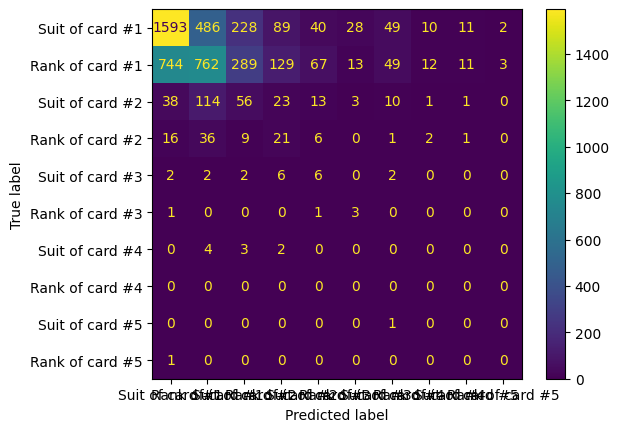

In [49]:
matrix_names = ["Suit of card #1", "Rank of card #1", "Suit of card #2", "Rank of card #2", "Suit of card #3", "Rank of card #3", "Suit of card #4", "Rank of card #4", "Suit of card #5", "Rank of card #5"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=matrix_names)
disp.plot()
plt.grid(False)

In [50]:
print("Mean_Squared_Error",mean_squared_error(Y_test, Y_pred))
print("G-Mean", geometric_mean_score(Y_test, Y_pred))
print("kappa", cohen_kappa_score( Y_test, Y_pred))
print("MCC", matthews_corrcoef(Y_test, Y_pred))

Mean_Squared_Error 0.5403838464614155
G-Mean 0.0
kappa 0.359532707078452
MCC 0.36721845838051537
